In [1]:
from numpy.matrixlib.defmatrix import matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data CollectionAnalysis

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/Insurence_Price/insurance.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


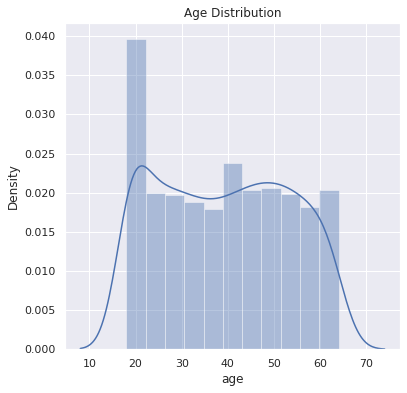

In [3]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

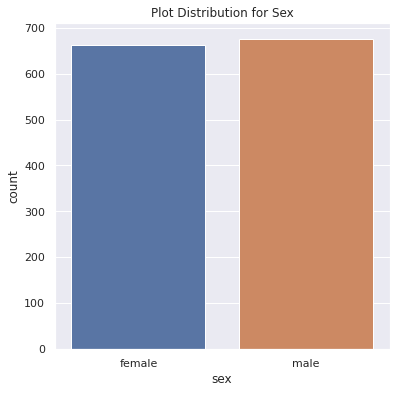

In [4]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Plot Distribution for Sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


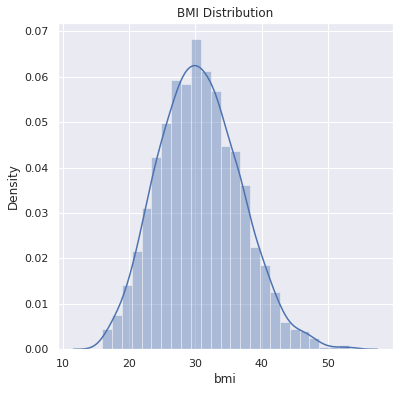

In [5]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


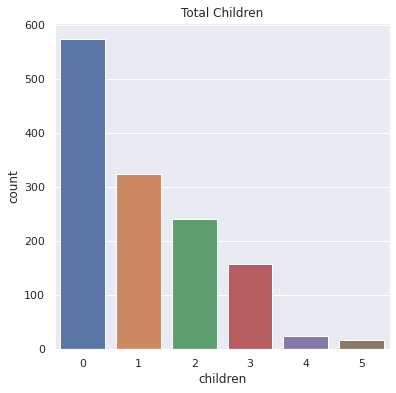

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Total Children')
plt.show()

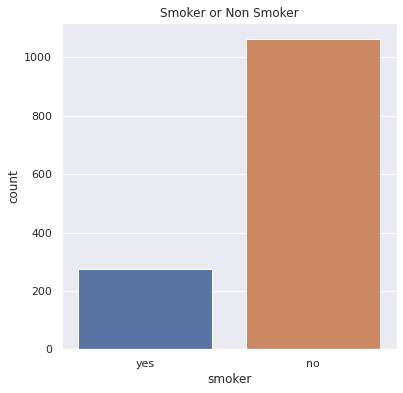

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("Smoker or Non Smoker")
plt.show()

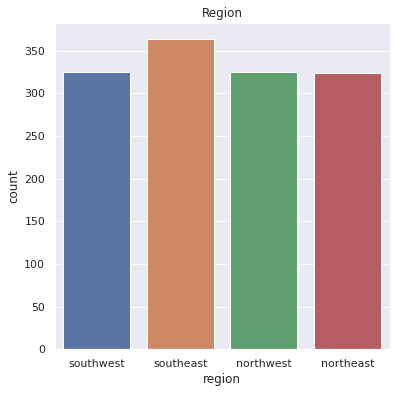

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


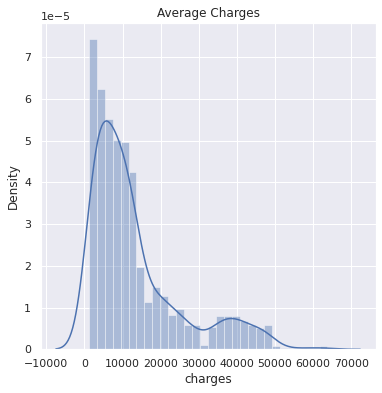

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("Average Charges")
plt.show()

**Data Pre Processing**

In [11]:
#Encoding the categorical features
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [12]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


**Spliting the feature & target**

In [13]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

**Spliting Traing and Testing Data**

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(x.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model Training**

In [16]:
regressor=LinearRegression()

In [17]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [18]:
#Prediction on training data
training_prediction=regressor.predict(X_train)

In [19]:
#R Square value
r2_train=metrics.r2_score(Y_train,training_prediction)
print('R sqauare value',r2_train)

R sqauare value 0.7519923667088932


In [20]:
#Predict on test data
test_prediction=regressor.predict(X_test)

In [21]:
r2_test=metrics.r2_score(Y_test,test_prediction)
print('R square value',r2_test)

R square value 0.7445422986536503


In [25]:
#Building a predictive system
input_data=(31,1,25.74,0,0,1)
#Changing input data to numpy array
input_np_array=np.asarray(input_data)
#Reshape the array(To tell we are doing for one particular value)
input_reshape=input_np_array.reshape(1,-1)
predictor=regressor.predict(input_reshape)
print(predictor)

[3911.4481614]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
